In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

42.31013108247447 -19.146548149323422
-25.44767587782644 147.786902472826
41.120085970586445 54.45573548534907
-46.912875478972936 158.53048570562873
-33.72318830688711 45.54993679574011
-71.02576557246633 -128.0407917178249
-51.9521976723634 -166.3064060289802
80.08733425337724 39.414366361134086
-55.40691631657782 -136.68553040293125
71.74019393630871 -80.40752813432762
-20.404419843931933 106.39735429977782
31.078474201977443 95.5163017219092
-76.3625504346051 -145.07511906082425
-32.17040110120997 -130.22675138118342
18.453208958117116 54.0087449308875
78.56480437967116 106.3730043318858
37.14655182896874 -17.766925363380153
83.92567194365225 35.127829716601696
11.051699600092135 88.5253534456246
48.948078929728524 157.8645343296073
-85.29541851171638 137.3538149910063
53.39895647212944 -38.29523704658172
-42.129574678909314 -41.37927203034582
-30.13606000766518 -46.90159038098989
50.3184107810157 -42.643070727350164
8.350151262547627 155.0775790237966
-76.98123304024165 -123.78777

74.83299409351432 84.79637388479222
-74.74627032242397 75.11380263826032
61.119372463290404 -170.37500636006305
-64.65115481412546 -12.527060983301112
-62.73948344766207 -128.26342137546573
59.080478571215906 89.60770780501713
87.64288761536855 -29.619106352622822
-22.40382447213537 -96.21371675129812
-52.18074461561129 158.16378515383923
-60.225525172006705 79.7480388630621
-10.57025742290196 117.78951966025335
-36.81056516509297 -101.98058220540756
40.53162575052295 -34.044096875340244
-47.09548508804728 17.282035512306095
-42.631667073406 150.98005739320928
24.149943191949887 157.9383745715238
-64.58796982521012 -145.29822356694575
15.521243980573544 55.91168558585258
-68.01020819056136 162.28534566460053
36.499167960681646 79.37799603893797
25.12470781251689 154.03561266110432
61.20745316711452 11.672148962121724
78.35700168638928 -70.98945251989899
-84.70152809776788 63.64129718734051
12.168248875410498 -75.2790267398168
-74.0237550064528 -82.51153022219489
8.827304604646201 67.96

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | roma
Processing Record 3 of Set 1 | balkanabat
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | along
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | camacha
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | rio grande
Processing Record 2

Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | nagato
Processing Record 40 of Set 4 | talagang
Processing Record 41 of Set 4 | shelburne
Processing Record 42 of Set 4 | samara
Processing Record 43 of Set 4 | bereda
Processing Record 44 of Set 4 | manta
Processing Record 45 of Set 4 | tselinnoye
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | praia da vitoria
Processing Record 50 of Set 4 | quelimane
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | ares
Processing Record 3 of Set 5 | aksarayskiy
Processing Record 4 of Set 5 | muzquiz
City not found. Skipping...
Processing Record 5 of Set 5 | acapulco
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | chapeco
Processing Record 8 of Set 5 | galgani
City not found. Skipping...
Processing Record 9 of Set 5 | sattur
Processing Record

Processing Record 22 of Set 8 | aranos
Processing Record 23 of Set 8 | jinchang
Processing Record 24 of Set 8 | da nang
Processing Record 25 of Set 8 | sidney
Processing Record 26 of Set 8 | nagorsk
Processing Record 27 of Set 8 | banepa
Processing Record 28 of Set 8 | tonj
Processing Record 29 of Set 8 | ilulissat
Processing Record 30 of Set 8 | abreus
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | niihama
Processing Record 33 of Set 8 | pouembout
Processing Record 34 of Set 8 | matara
Processing Record 35 of Set 8 | waingapu
Processing Record 36 of Set 8 | marsh harbour
Processing Record 37 of Set 8 | pedro velho
Processing Record 38 of Set 8 | zandak
Processing Record 39 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 8 | karaul
City not found. Skipping...
Processing Record 41 of Set 8 | limon
Processing Record 42 of Set 8 | aksarka
Processing Record 43 of Set 8 | mezotur
Processing Record 44 of Set 8 | kutum
Processing R

Processing Record 9 of Set 12 | naze
Processing Record 10 of Set 12 | cordoba
Processing Record 11 of Set 12 | buala
Processing Record 12 of Set 12 | burnie
Processing Record 13 of Set 12 | dali
Processing Record 14 of Set 12 | olga
Processing Record 15 of Set 12 | tigil
Processing Record 16 of Set 12 | puerto madryn
Processing Record 17 of Set 12 | urumqi
Processing Record 18 of Set 12 | novoye leushino
Processing Record 19 of Set 12 | cam ranh
Processing Record 20 of Set 12 | ylivieska
Processing Record 21 of Set 12 | sahuaripa
Processing Record 22 of Set 12 | ola
Processing Record 23 of Set 12 | xichang
Processing Record 24 of Set 12 | presidente medici
Processing Record 25 of Set 12 | kismayo
Processing Record 26 of Set 12 | samarai
Processing Record 27 of Set 12 | leh
Processing Record 28 of Set 12 | key west
Processing Record 29 of Set 12 | gao
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | sawankhalok
Processing Record 32 of Set 12 | sola
Processing R

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca Do Campo,37.7167,-25.4333,71.20,82,66,10.00,PT,2022-08-15 23:39:57
1,Roma,43.2128,-75.4557,77.14,66,20,5.75,US,2022-08-15 23:39:58
2,Balkanabat,39.5108,54.3671,87.80,16,0,6.89,TM,2022-08-15 23:39:58
3,Tuatapere,-46.1333,167.6833,56.88,71,89,4.12,NZ,2022-08-15 23:39:59
4,Rikitea,-23.1203,-134.9692,73.36,76,1,14.54,PF,2022-08-15 23:39:59
5,Avarua,-21.2078,-159.7750,73.45,53,96,10.36,CK,2022-08-15 23:40:00
6,Clyde River,70.4692,-68.5914,41.23,93,100,13.80,CA,2022-08-15 23:40:00
7,Carnarvon,-24.8667,113.6333,69.51,83,87,16.37,AU,2022-08-15 23:40:01
8,Along,28.1667,94.7667,74.97,99,95,0.76,IN,2022-08-15 23:40:01
9,Mataura,-46.1927,168.8643,50.49,63,76,3.33,NZ,2022-08-15 23:40:01


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Franca Do Campo,PT,2022-08-15 23:39:57,37.7167,-25.4333,71.20,82,66,10.00
1,Roma,US,2022-08-15 23:39:58,43.2128,-75.4557,77.14,66,20,5.75
2,Balkanabat,TM,2022-08-15 23:39:58,39.5108,54.3671,87.80,16,0,6.89
3,Tuatapere,NZ,2022-08-15 23:39:59,-46.1333,167.6833,56.88,71,89,4.12
4,Rikitea,PF,2022-08-15 23:39:59,-23.1203,-134.9692,73.36,76,1,14.54


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

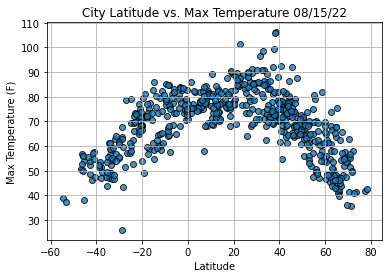

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

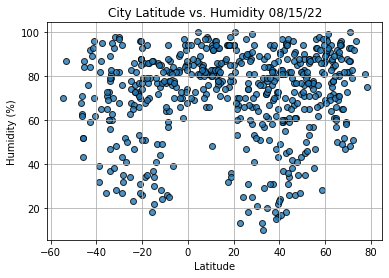

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

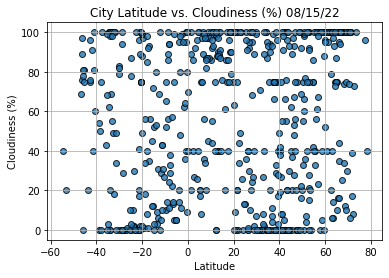

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

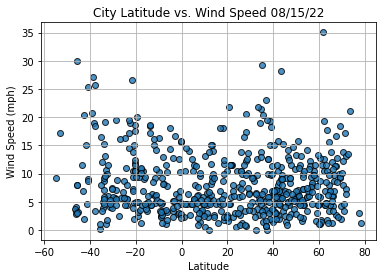

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()